In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_zarr("/data_2/scratch/dbrueggemann/output/anomalies.zarr")

In [3]:
ds

<xarray.Dataset>
Dimensions:      (E: 17500, N: 11050, time: 12)
Coordinates:
  * E            (E) float64 2.484e+06 2.484e+06 ... 2.834e+06 2.834e+06
  * N            (N) float64 1.296e+06 1.296e+06 ... 1.075e+06 1.075e+06
  * time         (time) <U3 'Jan' 'Feb' 'Mar' 'Apr' ... 'Sep' 'Oct' 'Nov' 'Dec'
Data variables:
    data         (time, N, E) uint8 dask.array<chunksize=(12, 2000, 2000), meta=np.ndarray>
    forest_mask  (N, E) bool dask.array<chunksize=(2000, 2000), meta=np.ndarray>
Attributes:
    crs:                  EPSG:2056
    missing_id:           255
    negative_anomaly_id:  0
    normal_id:            1
    positive_anomaly_id:  2

In [4]:
# check proportion of anomalies
negative_anomaly_mask = (ds["data"].values == 0)
no_anomaly_mask = (ds["data"].values == 1)
positive_anomaly_mask = (ds["data"].values == 2)

print((negative_anomaly_mask.sum() + positive_anomaly_mask.sum()) / no_anomaly_mask.sum())

0.046101663990935945


In [13]:
# convert zarr file to NetCDF (will be much larger in size)
ds.to_netcdf("/data_2/scratch/dbrueggemann/output/anomalies.nc")

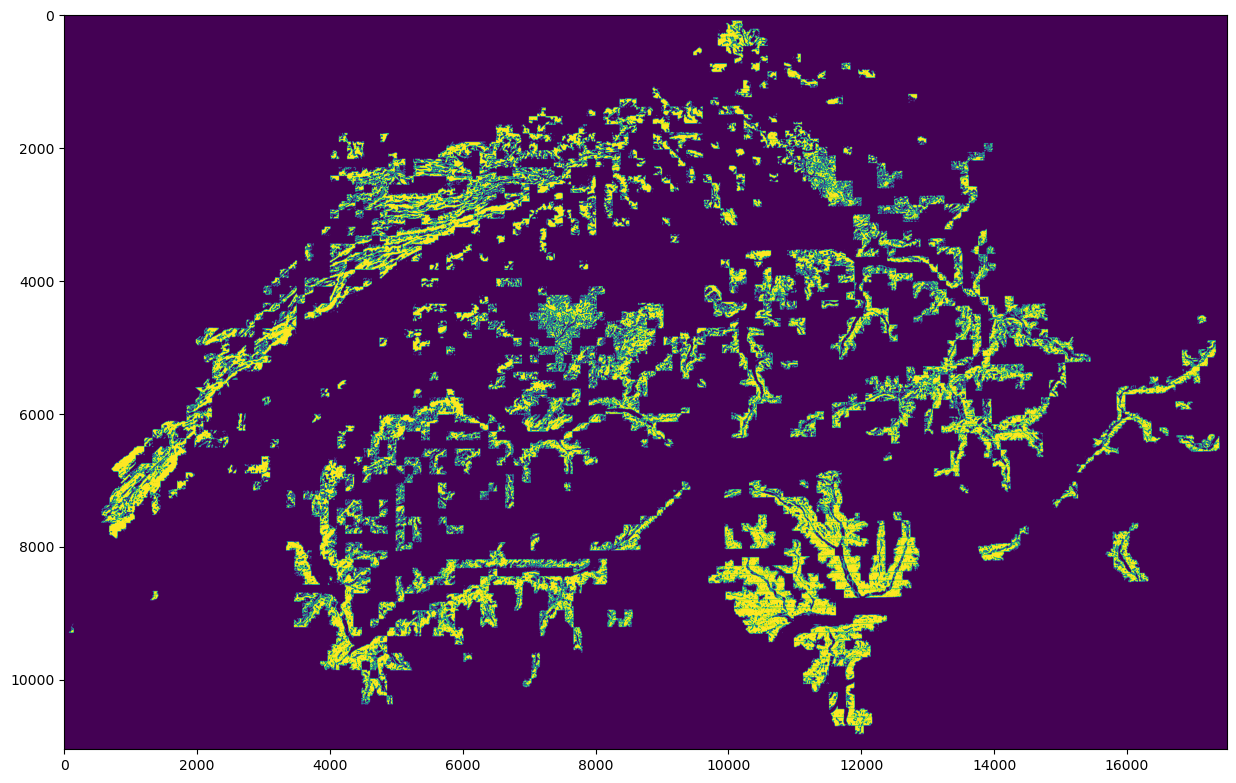

In [ ]:
# Plot the forest mask

fmask = ds["forest_mask"].values

plt.figure(figsize=(15, 15))
plt.imshow(fmask)

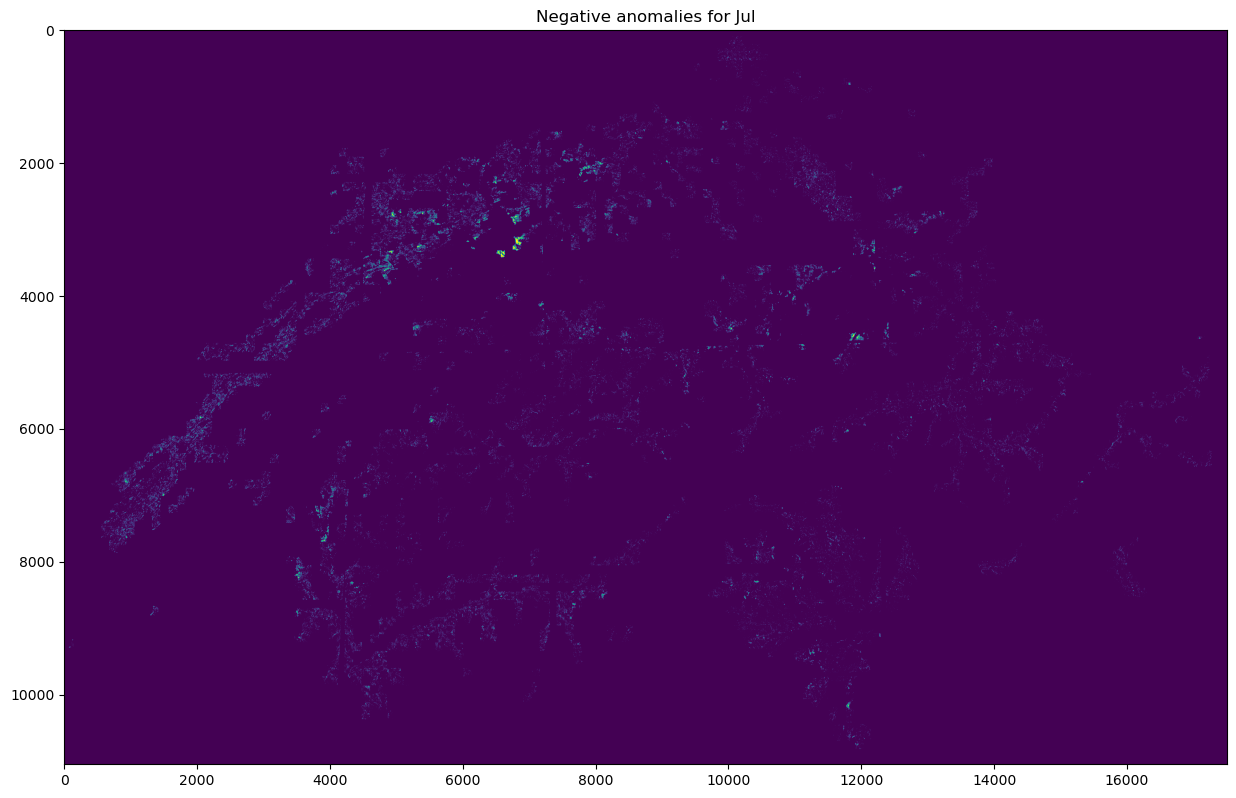

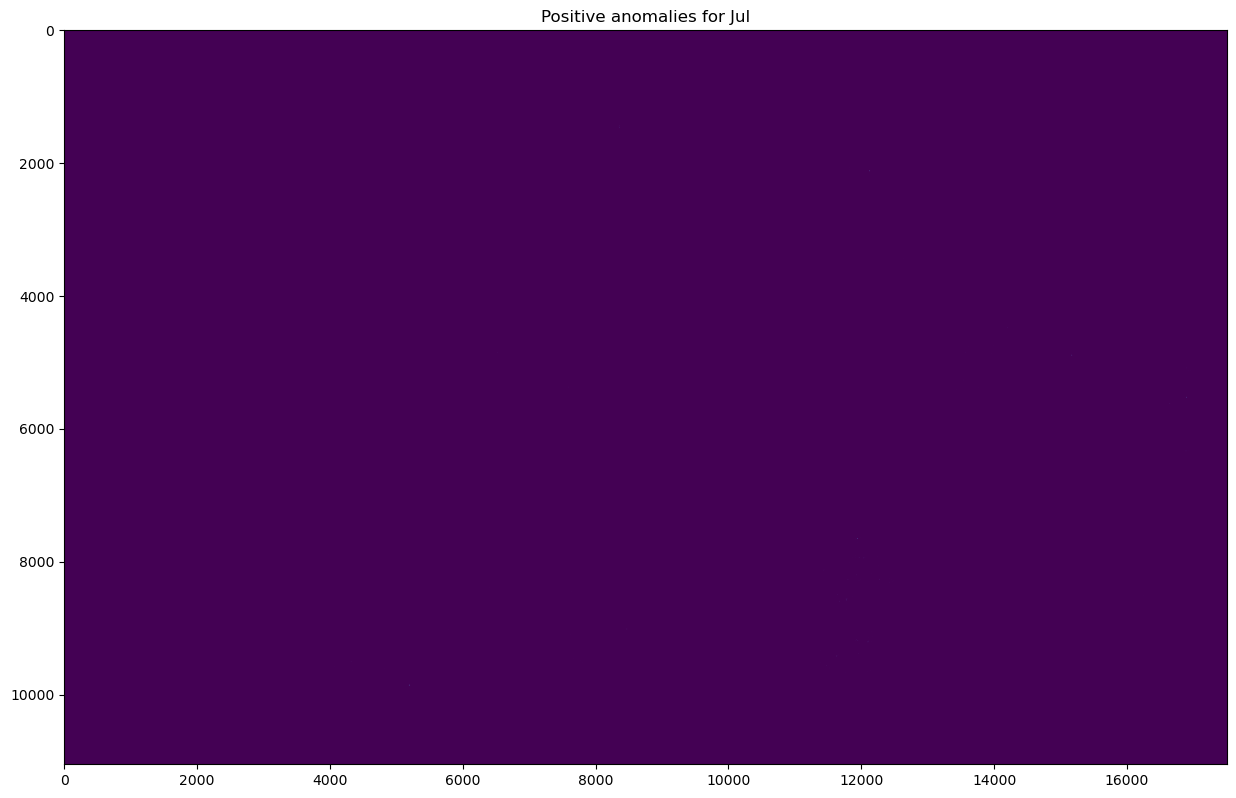

In [ ]:
# Plot anomalies

# First three letter of month
month = "Jul"

anoms = ds["data"].loc[month].values

plt.figure(figsize=(15, 15))
plt.imshow(anoms == 0)
plt.title(f"Negative anomalies for {month}");
plt.show()

plt.figure(figsize=(15, 15))
plt.imshow(anoms == 2)
plt.title(f"Positive anomalies for {month}");
plt.show()